In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### 一.简单理解数据
很自然的我们首先需要知道数据的这些信息：   

（1）字段含义；  

（2）数据规模；  

（3）字段类型；   

（4）字段取值范围；  

（5）饱和度；


#### 字段含义
对于本数据集，对应字段含义如下：   

| Survived | Pclass | Name |Sex | Age | SibSp |Parch | Ticket | Fare | Cabin | Embarked |
| ------ | ------ | ------ |------ | ------ | ------ |------ | ------ | ------ | ------ | ------ |
| 0代表死亡，1代表存活 | 乘客所持票类 | 乘客姓名 |乘客性别 | 乘客年龄 | 乘客兄弟姐妹/配偶的个数 |乘客父母/孩子的个数 | 票号 | 乘客所持票的价格 | 乘客所在船舱 | 乘客登船港口:S、C、Q |   

接下来读取数据看看

In [2]:
train_df=pd.read_csv('./titanic/train.csv')
test_df=pd.read_csv('./titanic/test.csv')

#### 数据规模

In [3]:
train_df.shape,test_df.shape

((891, 12), (418, 11))

#### 字段类型

通过对前几行数据的观测，我们大致可以知道数据的类型，以及其大致取值，那么我们可以对数据按**功能**和**字段类型**进行分类，   

从功能上我们可以简单把数据分为两类，一类是离散型特征、一类是数值型特征：  

（1）数值型特征：对**“比较大小”**有意义的特征，所以不一定非要数值类型的才能比较大小，比如对于收入“高”，“中”，“低”虽然是字符类型，但其实可以进行比较

（2）离散型特征：当然就是无法比较的特征，比如对于爱好“篮球”，“足球”这些就不能比较，另外有些数值类型的特征比较也是没有意义的，比如下面的PassengerId这种id特征   

所以我们可以将特征归到这样的一个表格中：   

表现\功能 | 离散型特征 |  数值型特征  
:- | :-: | -:
int,float | PassengerId,**Pclass** | Age,**Pclass**,SibSp,Parch,Fare 
str | Name,Sex,Ticket,Cabin,Embarked |  

In [4]:
#查看数据前几行
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 字段取值范围  
使用describe可以很方便

In [5]:
#浮点数
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#字符型
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Roebling, Mr. Washington Augustus II",male,1601,B96 B98,S
freq,1,577,7,4,644


In [7]:
#describe不能看到所有的取值，我们可以使用value_counts
train_df['Cabin'].value_counts().head(5)

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
D              3
Name: Cabin, dtype: int64

#### 饱和度
通过空值占比，可以了解字段的饱和度情况，有些字段虽然从含义看起来有用，但实际饱和度太低，依旧无法实现，避免开心太早~~~

PS：注意，**某些字段的0值等价于空值**，比如身高、体重这样的标签，如果取值为0，其实和取值为空一样，没有提供有用信息

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 二.数据可视化

数据可视化是帮助我们进一步理解数据的有用工具，可以让我们很直观的感受一些指标

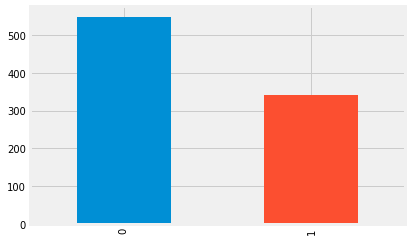

In [9]:
#存活分布:没有明显的不平衡
train_df["Survived"].value_counts().plot(kind='bar')

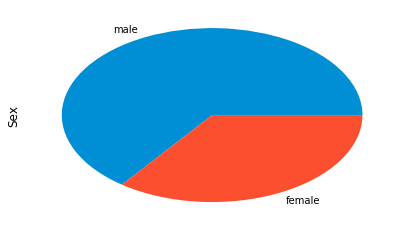

In [10]:
#性别分布
train_df['Sex'].value_counts().sort_values(ascending=False).plot(kind='pie')

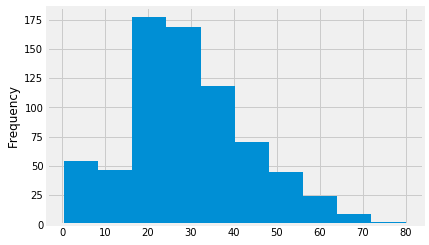

In [11]:
#年龄分布，直方图
train_df['Age'].plot(kind='hist')

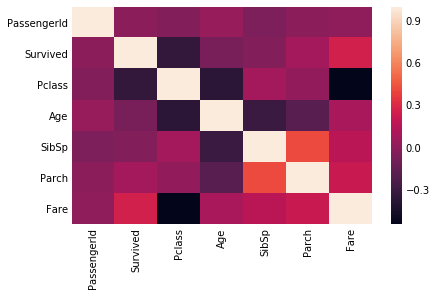

In [12]:
#相关性分布
sns.heatmap(train_df.corr())

可以发现是否存活与Fare/票价的正相关性最强，与Pclass负相关性最强